<a href="https://colab.research.google.com/github/Manojkumarchodavarapu/IPL_Data_Analysis/blob/main/IPL_DATA_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1.Problem statement**

"This is ipl data containg of two data sets , which one data set tells us about the venue,player of the match,batsman,bowler,toss,umpires and the other tells us about total runs,wickets stats from 2008-2024 . Here we try to give the oviewview of the batsman,bowler,toss decidions,venues and more."

**2.Importing packages**

In [69]:
#DATA ANALYSIS

import pandas as pd
import numpy as np

#DATA VISUALISATION

import seaborn as sns
import matplotlib.pyplot as plt



**3.Loading Data**

In this EDA notebook we are using two datasets about Indian Premier League.

**IPL matches dataset(dfm):** This dataset contains information about the venues, players, umpires, toss decisions in 696 matches of IPL from 2008 - 2024.

**IPL deliveries dataset(dfb):** This dataset contains ball-by-ball information about 696 matches of IPL from 2008 - 2024.

In [70]:
#LOAD MATCHES
dfm = pd.read_csv('/content/matches.csv')

#LOAD DELIVERIES
dfb = pd.read_csv('/content/deliveries.csv')

**Description of the dataset-1 : matches**

This dataset provides match-level information from IPL till 2024, including details like toss winner and decision, match result and margin, target runs and overs, super over status, and umpire names for each match.

In [71]:
# Display the first 5 rows of the matches dataframe to get an overview of the data
dfm.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [72]:
# Get a concise summary of the dataframe including column types, non-null counts, and memory usage
dfm.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

There are **1,095** total rows
**20** columns with a mix of data types:

**int64** for numeric values like match ID

**float64** for numerical columns like result_margin, target_runs, and target_overs (some missing values)

**object** for categorical/text data like teams, venue, toss decisions, result, etc.

**Columns like city, player_of_match, winner, and method have missing values**

**Description of the dataset-2 : deliveries**

This dataset provides deliveries information in IPL till 2024. It gives ball by ball details of all matches in IPL along with total runs scored by each batsman, wickets taken by each bowler and extras provided in each match

In [73]:
 dfb.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [74]:
dfb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          260920 non-null  int64 
 1   inning            260920 non-null  int64 
 2   batting_team      260920 non-null  object
 3   bowling_team      260920 non-null  object
 4   over              260920 non-null  int64 
 5   ball              260920 non-null  int64 
 6   batter            260920 non-null  object
 7   bowler            260920 non-null  object
 8   non_striker       260920 non-null  object
 9   batsman_runs      260920 non-null  int64 
 10  extra_runs        260920 non-null  int64 
 11  total_runs        260920 non-null  int64 
 12  extras_type       14125 non-null   object
 13  is_wicket         260920 non-null  int64 
 14  player_dismissed  12950 non-null   object
 15  dismissal_kind    12950 non-null   object
 16  fielder           9354 non-null    obj

There are **260,920** total rows
**17 columns** with a mix of data types:

**int64** for numerical values like over, ball, runs, and wicket indicators

**object** for categorical/text data like teams, players, and dismissal details

**Columns like extras_type, player_dismissed, dismissal_kind, and fielder have many missing values (since not every delivery involves extras or wickets)**



# DATA CLEANING

**1:**
**City has 51 missing values.**

In [75]:
dfm[dfm['city'].isnull()]

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
399,729281,2014,NaN,2014-04-17,League,YS Chahal,Sharjah Cricket Stadium,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Royal Challengers Bangalore,wickets,8.0,146.0,20.0,N,NaN,Aleem Dar,S Ravi
402,729287,2014,NaN,2014-04-19,League,PA Patel,Dubai International Cricket Stadium,Royal Challengers Bangalore,Mumbai Indians,Royal Challengers Bangalore,field,Royal Challengers Bangalore,wickets,7.0,116.0,20.0,N,NaN,Aleem Dar,AK Chaudhary
403,729289,2014,NaN,2014-04-19,League,JP Duminy,Dubai International Cricket Stadium,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,Delhi Daredevils,wickets,4.0,167.0,20.0,N,NaN,Aleem Dar,VA Kulkarni
404,729291,2014,NaN,2014-04-20,League,GJ Maxwell,Sharjah Cricket Stadium,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,field,Kings XI Punjab,wickets,7.0,192.0,20.0,N,NaN,BF Bowden,M Erasmus
406,729295,2014,NaN,2014-04-22,League,GJ Maxwell,Sharjah Cricket Stadium,Kings XI Punjab,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Kings XI Punjab,runs,72.0,194.0,20.0,N,NaN,M Erasmus,S Ravi
407,729297,2014,NaN,2014-04-23,League,RA Jadeja,Dubai International Cricket Stadium,Rajasthan Royals,Chennai Super Kings,Rajasthan Royals,field,Chennai Super Kings,runs,7.0,141.0,20.0,N,NaN,HDPK Dharmasena,RK Illingworth
408,729299,2014,NaN,2014-04-24,League,CA Lynn,Sharjah Cricket Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,2.0,151.0,20.0,N,NaN,Aleem Dar,VA Kulkarni
409,729301,2014,NaN,2014-04-25,League,AJ Finch,Dubai International Cricket Stadium,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,Sunrisers Hyderabad,runs,4.0,185.0,20.0,N,NaN,M Erasmus,S Ravi
410,729303,2014,NaN,2014-04-25,League,MM Sharma,Dubai International Cricket Stadium,Chennai Super Kings,Mumbai Indians,Mumbai Indians,bat,Chennai Super Kings,wickets,7.0,142.0,20.0,N,NaN,BF Bowden,M Erasmus
413,729309,2014,NaN,2014-04-27,League,M Vijay,Sharjah Cricket Stadium,Delhi Daredevils,Mumbai Indians,Mumbai Indians,bat,Delhi Daredevils,wickets,6.0,126.0,20.0,N,NaN,Aleem Dar,VA Kulkarni


The missing values in the city column correspond to venues located in **Dubai and Sharjah**. These null values were filled based on their respective venues — i.e., if the venue is Dubai International Stadium, the city was filled as Dubai, and similarly for Sharjah Cricket Stadium, the city was set as Sharjah.

In [76]:
#Updating the records whose city = NaN and venue = Dubai International Cricket Stadium as city = 'Dubai'
dfm.loc[(dfm['city'].isnull()) & (dfm['venue'] == 'Dubai International Cricket Stadium'), 'city'] = 'Dubai'

In [77]:
#Updating the remaining cities with null value as Sharjah
dfm.loc[(dfm['city'].isnull()) , 'city'] = 'Sharjah'

In [78]:
dfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1095 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

**All the cities are updated.**

**2. Player of the match has 5 missing values**

In [79]:
dfm[dfm['player_of_match'].isnull()]

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
241,501265,2011,Delhi,2011-05-21,League,NaN,Feroz Shah Kotla,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,NaN,no result,NaN,NaN,NaN,N,NaN,SS Hazare,RJ Tucker
485,829763,2015,Bangalore,2015-04-29,League,NaN,M Chinnaswamy Stadium,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,NaN,no result,NaN,NaN,NaN,N,NaN,JD Cloete,PG Pathak
511,829813,2015,Bangalore,2015-05-17,League,NaN,M Chinnaswamy Stadium,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,field,NaN,no result,NaN,188.0,20.0,N,NaN,HDPK Dharmasena,K Srinivasan
744,1178424,2019,Bengaluru,2019-04-30,League,NaN,M.Chinnaswamy Stadium,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,NaN,no result,NaN,63.0,5.0,N,NaN,NJ Llong,UV Gandhe
994,1359519,2023,Lucknow,2023-05-03,League,NaN,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,Lucknow Super Giants,Chennai Super Kings,Chennai Super Kings,field,NaN,no result,NaN,NaN,NaN,N,NaN,AK Chaudhary,NA Patwardhan


Missing player_of_match values are due to matches with no result, where no player was awarded.

In [80]:
#Updating the NULL values with 'No Result'
dfm.loc[(dfm['player_of_match'].isnull()) , 'player_of_match'] = 'No Result'

In [81]:
dfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1095 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1095 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

**All the  player_of_match are updated.**

**3. Updating NULL values in winner with 'No Result'**

In [82]:
dfm.loc[(dfm['winner'].isnull()) , 'winner'] = 'No Result'

In [83]:
dfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1095 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1095 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1095 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

**4. 19 records fo result_margin are missing**

In [84]:
dfm[dfm['result_margin'].isnull()]

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
66,392190,2009,Cape Town,2009-04-23,League,YK Pathan,Newlands,Kolkata Knight Riders,Rajasthan Royals,Kolkata Knight Riders,field,Rajasthan Royals,tie,NaN,151.0,20.0,Y,NaN,MR Benson,M Erasmus
130,419121,2009/10,Chennai,2010-03-21,League,J Theron,"MA Chidambaram Stadium, Chepauk",Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,field,Kings XI Punjab,tie,NaN,137.0,20.0,Y,NaN,K Hariharan,DJ Harper
241,501265,2011,Delhi,2011-05-21,League,No Result,Feroz Shah Kotla,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,No Result,no result,NaN,NaN,NaN,N,NaN,SS Hazare,RJ Tucker
328,598004,2013,Hyderabad,2013-04-07,League,GH Vihari,"Rajiv Gandhi International Stadium, Uppal",Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,bat,Sunrisers Hyderabad,tie,NaN,131.0,20.0,Y,NaN,AK Chaudhary,S Ravi
342,598017,2013,Bangalore,2013-04-16,League,V Kohli,M Chinnaswamy Stadium,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,field,Royal Challengers Bangalore,tie,NaN,153.0,20.0,Y,NaN,M Erasmus,VA Kulkarni
416,729315,2014,Abu Dhabi,2014-04-29,League,JP Faulkner,Sheikh Zayed Stadium,Kolkata Knight Riders,Rajasthan Royals,Rajasthan Royals,bat,Rajasthan Royals,tie,NaN,153.0,20.0,Y,NaN,Aleem Dar,AK Chaudhary
475,829741,2015,Ahmedabad,2015-04-21,League,SE Marsh,"Sardar Patel Stadium, Motera",Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,field,Kings XI Punjab,tie,NaN,192.0,20.0,Y,NaN,M Erasmus,S Ravi
485,829763,2015,Bangalore,2015-04-29,League,No Result,M Chinnaswamy Stadium,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,No Result,no result,NaN,NaN,NaN,N,NaN,JD Cloete,PG Pathak
511,829813,2015,Bangalore,2015-05-17,League,No Result,M Chinnaswamy Stadium,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,field,No Result,no result,NaN,188.0,20.0,N,NaN,HDPK Dharmasena,K Srinivasan
610,1082625,2017,Rajkot,2017-04-29,League,KH Pandya,Saurashtra Cricket Association Stadium,Gujarat Lions,Mumbai Indians,Gujarat Lions,bat,Mumbai Indians,tie,NaN,154.0,20.0,Y,NaN,AK Chaudhary,CB Gaffaney


**Updating the missing values with 0.**

In [85]:
dfm.loc[(dfm['result_margin'].isnull()) , 'result_margin'] = 0

In [86]:
dfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1095 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1095 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1095 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1095 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

**5.Deleting the column ' method '**

In [87]:
dfm.drop('method', axis=1, inplace=True)

In [88]:
dfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1095 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1095 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1095 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1095 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  umpire1       

**6. Checking the names of Teams**

In [89]:
  dfm.team1.value_counts()

,count
team1,
Royal Challengers Bangalore,135
Chennai Super Kings,128
Mumbai Indians,123
Kolkata Knight Riders,121
Rajasthan Royals,101
Kings XI Punjab,92
Sunrisers Hyderabad,86
Delhi Daredevils,85
Delhi Capitals,41


**The team names were need to be updated to reflect their current or official names. Royal Challengers Bengaluru was changed to Royal Challengers Bangalore, Kings XI Punjab to Punjab Kings, Delhi Daredevils to Delhi Capitals, and Rising Pune Supergiant to Rising Pune Supergiants.**



In [90]:
#Updating the Team Names
dfm.replace('Royal Challengers Bangalore','Royal Challengers Bengaluru'  , inplace = True)
dfm.replace('Kings XI Punjab','Punjab Kings' , inplace = True)
dfm.replace( 'Delhi Daredevils','Delhi Capitals'  , inplace = True)
dfm.replace('Rising Pune Supergiant' , 'Rising Pune Supergiants' , inplace = True)

dfb.replace('Royal Challengers Bangalore','Royal Challengers Bengaluru'  , inplace = True)
dfb.replace('Kings XI Punjab','Punjab Kings' , inplace = True)
dfb.replace( 'Delhi Daredevils','Delhi Capitals'  , inplace = True)
dfb.replace('Rising Pune Supergiant' , 'Rising Pune Supergiants' , inplace = True)

In [91]:
 dfm.team1.value_counts()

,count
team1,
Royal Challengers Bengaluru,144
Chennai Super Kings,128
Delhi Capitals,126
Mumbai Indians,123
Punjab Kings,123
Kolkata Knight Riders,121
Rajasthan Royals,101
Sunrisers Hyderabad,86
Deccan Chargers,39


**7. Checking names of the venues**

In [92]:
dfm.venue.value_counts()

,count
venue,
Eden Gardens,77
Wankhede Stadium,73
M Chinnaswamy Stadium,65
Feroz Shah Kotla,60
"Rajiv Gandhi International Stadium, Uppal",49
"MA Chidambaram Stadium, Chepauk",48
Sawai Mansingh Stadium,47
Dubai International Cricket Stadium,46
"Wankhede Stadium, Mumbai",45


The dataset contains several venue names that refer to the same stadium but are listed differently, causing duplication. These inconsistencies are mainly due to:

City or location names appended differently

Spelling variations or punctuation differences

Old vs. updated stadium names

In [93]:
#Updating venues
# Mapping variations to a single standard name
venue_mapping = {
     "Wankhede Stadium":"Wankhede Stadium, Mumbai",
    "M Chinnaswamy Stadium":"M Chinnaswamy Stadium, Bengaluru",
    "M.Chinnaswamy Stadium": "M Chinnaswamy Stadium, Bengaluru",
    "MA Chidambaram Stadium, Chepauk": "MA Chidambaram Stadium, Chepauk, Chennai",
    "MA Chidambaram Stadium":"MA Chidambaram Stadium, Chepauk, Chennai",
    "Rajiv Gandhi International Stadium, Uppal": "Rajiv Gandhi International Stadium, Uppal, Hyderabad",
    "Rajiv Gandhi International Stadium":"Rajiv Gandhi International Stadium, Uppal, Hyderabad",
    "Dr DY Patil Sports Academy":"Dr DY Patil Sports Academy, Mumbai",
    "Brabourne Stadium":"Brabourne Stadium, Mumbai",
    "Eden Gardens":"Eden Gardens, Kolkata",
    "Arun Jaitley Stadium":"Arun Jaitley Stadium, Delhi",
    "Punjab Cricket Association IS Bindra Stadium":"Punjab Cricket Association Stadium, Mohali",
    "Punjab Cricket Association IS Bindra Stadium, Mohali": "Punjab Cricket Association Stadium, Mohali",
    "Punjab Cricket Association IS Bindra Stadium, Mohali, Chandigarh": "Punjab Cricket Association Stadium, Mohali",
    "Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium":"Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium, Visakhapatnam",
    "Himachal Pradesh Cricket Association Stadium":"Himachal Pradesh Cricket Association Stadium, Dharamsala",
    "Sawai Mansingh Stadium":"Sawai Mansingh Stadium, Jaipur",
    "Maharashtra Cricket Association Stadium":"Maharashtra Cricket Association Stadium, Pune",
}

# Replace venue names
dfm['venue'] = dfm['venue'].replace(venue_mapping)


In [94]:
dfm.venue.value_counts()

,count
venue,
"Wankhede Stadium, Mumbai",118
"M Chinnaswamy Stadium, Bengaluru",94
"Eden Gardens, Kolkata",93
"MA Chidambaram Stadium, Chepauk, Chennai",85
"Rajiv Gandhi International Stadium, Uppal, Hyderabad",77
"Punjab Cricket Association Stadium, Mohali",61
Feroz Shah Kotla,60
"Sawai Mansingh Stadium, Jaipur",57
Dubai International Cricket Stadium,46


**8.Checking names of city**

In [95]:
dfm.city.value_counts()

,count
city,
Mumbai,173
Kolkata,93
Delhi,90
Chennai,85
Hyderabad,77
Bangalore,65
Chandigarh,61
Jaipur,57
Pune,51


**Updating city name of bengaluru to bangalore**

In [96]:
update1=dfm['city']=='Bengaluru'
dfm.loc[update1,'city']='Bangalore'

In [97]:
dfm.city.value_counts()

,count
city,
Mumbai,173
Bangalore,94
Kolkata,93
Delhi,90
Chennai,85
Hyderabad,77
Chandigarh,61
Jaipur,57
Pune,51


**9. Changing the season format in matches from '2007/08' to '2008'**

In [98]:
dfm.rename(columns={'id': 'match_id'}, inplace=True)

In [99]:
dfm['date'] = pd.to_datetime(dfm['date'])

dfm['season'] = dfm['date'].dt.year
dfm.head()

,match_id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,umpire1,umpire2
0,335982,2008,Bangalore,2008-04-18,League,BB McCullum,"M Chinnaswamy Stadium, Bengaluru",Royal Challengers Bengaluru,Kolkata Knight Riders,Royal Challengers Bengaluru,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,Asad Rauf,RE Koertzen
1,335983,2008,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Punjab Kings,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,MR Benson,SL Shastri
2,335984,2008,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,bat,Delhi Capitals,wickets,9.0,130.0,20.0,N,Aleem Dar,GA Pratapkumar
3,335985,2008,Mumbai,2008-04-20,League,MV Boucher,"Wankhede Stadium, Mumbai",Mumbai Indians,Royal Challengers Bengaluru,Mumbai Indians,bat,Royal Challengers Bengaluru,wickets,5.0,166.0,20.0,N,SJ Davis,DJ Harper
4,335986,2008,Kolkata,2008-04-20,League,DJ Hussey,"Eden Gardens, Kolkata",Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,BF Bowden,K Hariharan


# **Exploratory Data Analysis(EDA)**

**1.Winning Percentage of each team**

In [100]:
# Combine 'team1' and 'team2' columns to get a full list of all teams that played each match
matches_played = pd.concat([dfm['team1'], dfm['team2']], axis=0)

# Count matches played by each team
matches_played_count = matches_played.value_counts().reset_index()
matches_played_count.columns = ['Team', 'Matches_Played']

# Display the result
matches_played_count


,Team,Matches_Played
0,Mumbai Indians,261
1,Royal Challengers Bengaluru,255
2,Delhi Capitals,252
3,Kolkata Knight Riders,251
4,Punjab Kings,246
5,Chennai Super Kings,238
6,Rajasthan Royals,221
7,Sunrisers Hyderabad,182
8,Deccan Chargers,75
9,Pune Warriors,46


In [101]:
#Count the number of matches each team has won
won_matches = dfm['winner'].value_counts().reset_index()
won_matches.columns = ['Team', 'Matches_Won']
won_matches

,Team,Matches_Won
0,Mumbai Indians,144
1,Chennai Super Kings,138
2,Kolkata Knight Riders,131
3,Royal Challengers Bengaluru,123
4,Delhi Capitals,115
5,Rajasthan Royals,112
6,Punjab Kings,112
7,Sunrisers Hyderabad,88
8,Deccan Chargers,29
9,Gujarat Titans,28


In [102]:
 #Merge both counts on the team name
win_count = pd.merge(matches_played_count, won_matches, on='Team', how='left')

win_count = win_count.sort_values(by='Matches_Won', ascending=False).reset_index(drop=True)

#Add a rank starting from 1
win_count.index += 1
win_count.rename(columns={'index': 'Rank'}, inplace=True)

win_count

,Team,Matches_Played,Matches_Won
1,Mumbai Indians,261,144
2,Chennai Super Kings,238,138
3,Kolkata Knight Riders,251,131
4,Royal Challengers Bengaluru,255,123
5,Delhi Capitals,252,115
6,Punjab Kings,246,112
7,Rajasthan Royals,221,112
8,Sunrisers Hyderabad,182,88
9,Deccan Chargers,75,29
10,Gujarat Titans,45,28


In [103]:
win_count['Win %']=((win_count['Matches_Won']/win_count['Matches_Played'])*100).round(2)

# Sort the DataFrame by Win % in descending order
win_count_sorted = win_count.sort_values(by='Win %', ascending=False).reset_index(drop=True)

# Add rank starting from 1
win_count_sorted.index += 1

win_count_sorted

,Team,Matches_Played,Matches_Won,Win %
1,Gujarat Titans,45,28,62.22
2,Chennai Super Kings,238,138,57.98
3,Mumbai Indians,261,144,55.17
4,Lucknow Super Giants,44,24,54.55
5,Kolkata Knight Riders,251,131,52.19
6,Rajasthan Royals,221,112,50.68
7,Rising Pune Supergiants,30,15,50.00
8,Sunrisers Hyderabad,182,88,48.35
9,Royal Challengers Bengaluru,255,123,48.24
10,Delhi Capitals,252,115,45.63


<ipython-input-104-d3863ce90088>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-104-d3863ce90088>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-104-d3863ce90088>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


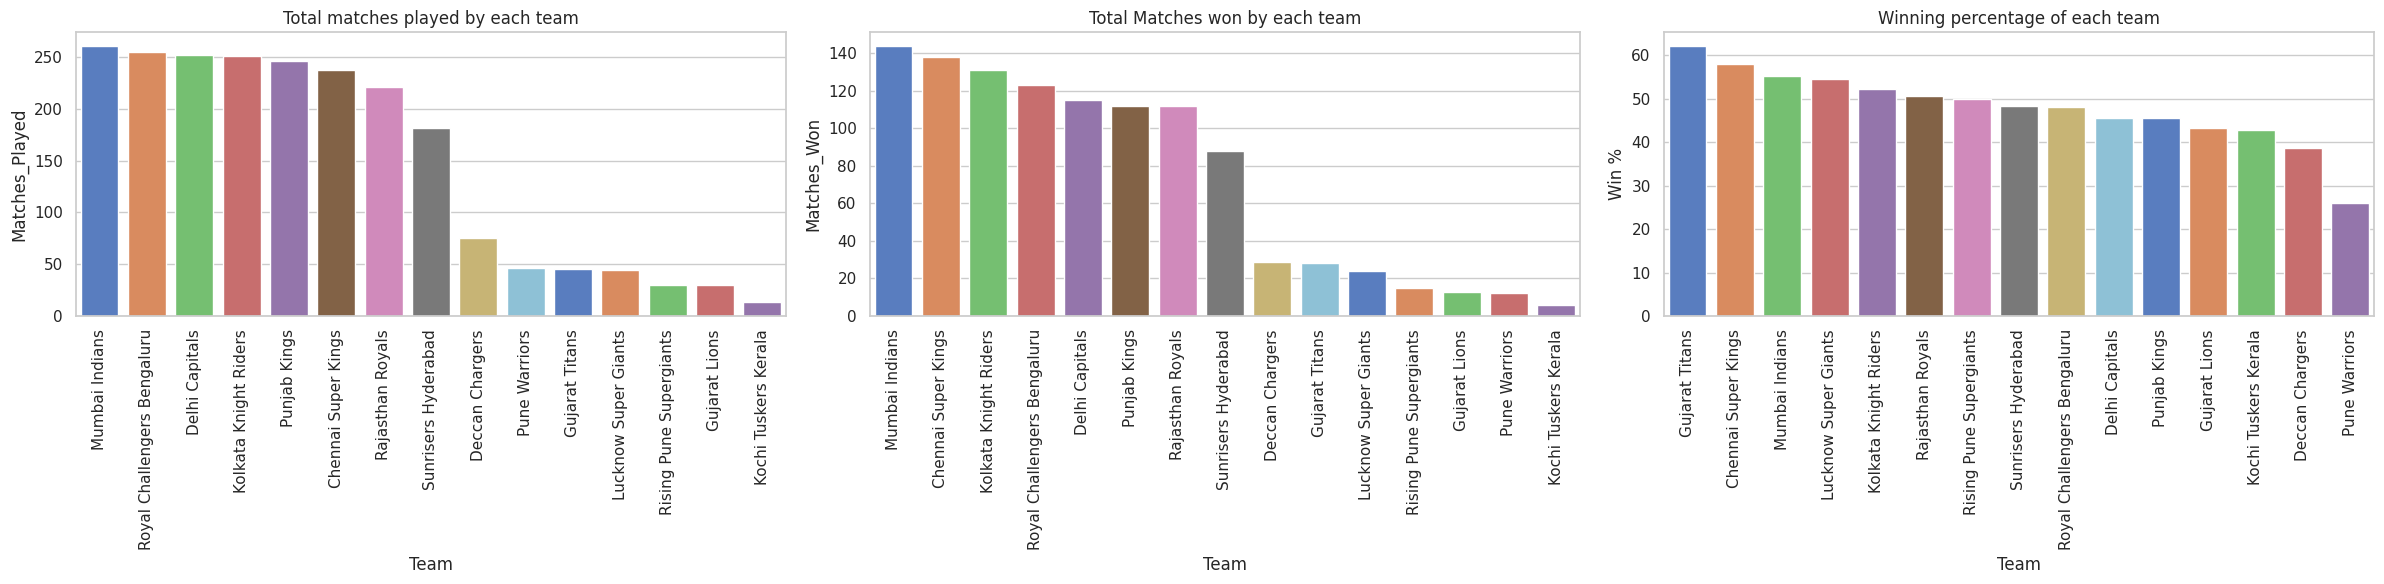

In [104]:


# Set the figure size
plt.figure(figsize=(24, 6))

# Plot 1: Total matches played by each team
plt.subplot(131)
sns.barplot(
    x=matches_played_count['Team'],
    y=matches_played_count['Matches_Played'],
    palette='muted'  # Assigns a distinct color to each bar
)
plt.xticks(rotation=90)
plt.title('Total matches played by each team')

# Plot 2: Total matches won by each team
plt.subplot(132)
sns.barplot(
    x=win_count['Team'],
    y=win_count['Matches_Won'],
    palette='muted'  # Assigns a different set of colors
)
plt.xticks(rotation=90)
plt.title('Total Matches won by each team')

# Plot 3: Winning percentage of each team
plt.subplot(133)
sns.barplot(
    x=win_count_sorted['Team'],
    y=win_count_sorted['Win %'],
    palette='muted'  # Uses another distinct palette
)
plt.xticks(rotation=90)
plt.title('Winning percentage of each team')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


**2. Who are the Top 10 run scorers in IPL?**

In [105]:
individual_scores =  dfb.groupby(['batter'])['batsman_runs'].sum().reset_index()
individual_scores = individual_scores.sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
individual_scores.index += 1
individual_scores.rename(columns={'index': 'Rank'}, inplace=True)
individual_scores.head(10)

,batter,batsman_runs
1,V Kohli,8014
2,S Dhawan,6769
3,RG Sharma,6630
4,DA Warner,6567
5,SK Raina,5536
6,MS Dhoni,5243
7,AB de Villiers,5181
8,CH Gayle,4997
9,RV Uthappa,4954
10,KD Karthik,4843


<ipython-input-106-34a967137fac>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


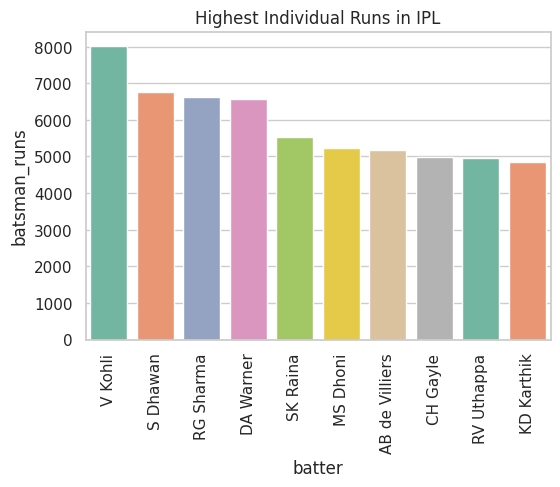

In [106]:
# Set the figure size
plt.figure(figsize=(6, 4))

sns.barplot(
    x=individual_scores['batter'][:10],
    y=individual_scores['batsman_runs'][:10],
    palette='Set2'
)
plt.xticks(rotation=90)
plt.title('Highest Individual Runs in IPL')

# Display the plot
plt.show()


**3.Who are the top 10 wicket-takers in IPL history?**

In [107]:
wicket_df = dfb[(dfb['is_wicket'] == 1) & (dfb['dismissal_kind']!='run out')]
# Grouping by 'bowler' and counting the number of wickets
bowler_wickets = wicket_df.groupby('bowler').size().reset_index(name='wickets')

bowler_wickets_sorted = bowler_wickets.sort_values(by='wickets', ascending=False)
bowler_wickets_sorted.index = range(1, len(bowler_wickets_sorted) + 1)
bowler_wickets_sorted.head(10)

,bowler,wickets
1,YS Chahal,205
2,PP Chawla,192
3,DJ Bravo,183
4,R Ashwin,181
5,B Kumar,181
6,SP Narine,180
7,A Mishra,174
8,SL Malinga,170
9,JJ Bumrah,168
10,RA Jadeja,160


<ipython-input-108-f5f1b728233c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


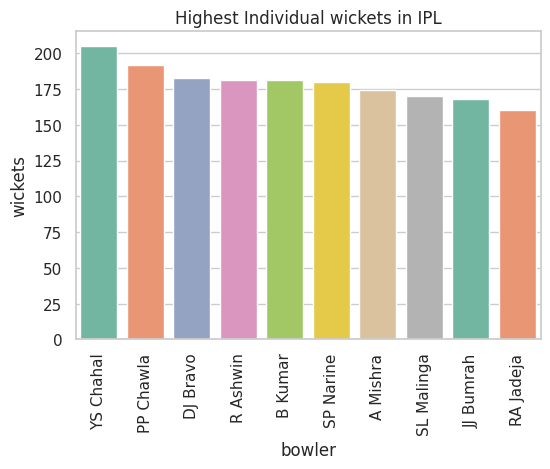

In [108]:
# Set the figure size
plt.figure(figsize=(6, 4))

sns.barplot(
    x=bowler_wickets_sorted['bowler'][:10],
    y=bowler_wickets_sorted['wickets'][:10],
    palette='Set2'
)
plt.xticks(rotation=90)
plt.title('Highest Individual wickets in IPL')

# Display the plot
plt.show()


**4.Who won the Orange Cap in each IPL season?**

In [109]:
 merged_df = pd.merge(dfm, dfb, on='match_id', how='outer')
season_runs = merged_df.groupby(['season', 'batter'])['batsman_runs'].sum().reset_index()

#  Get the top run scorer of each season
orange_cap = season_runs.sort_values(['season', 'batsman_runs'], ascending=[True, False]).drop_duplicates('season')
orange_cap.columns = ['Season', 'Orange Cap Winner', 'Runs']

# Display the result
orange_cap.reset_index(drop=True, inplace=True)
orange_cap.index += 1
orange_cap

,Season,Orange Cap Winner,Runs
1,2008,SE Marsh,616
2,2009,ML Hayden,572
3,2010,SR Tendulkar,618
4,2011,CH Gayle,608
5,2012,CH Gayle,733
6,2013,MEK Hussey,733
7,2014,RV Uthappa,660
8,2015,DA Warner,562
9,2016,V Kohli,973
10,2017,DA Warner,641


<ipython-input-110-ce956060646d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=orange_cap, x='Season', y='Runs', palette='Set2')


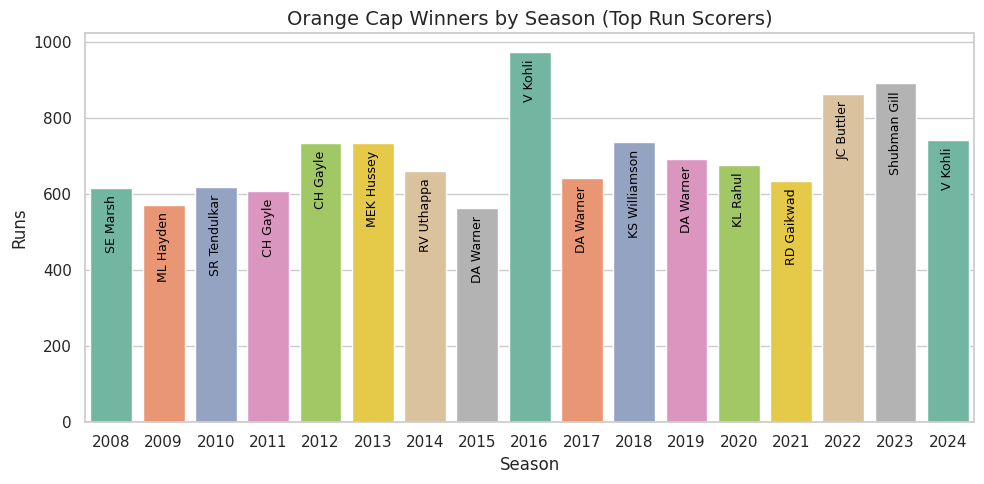

In [110]:
plt.figure(figsize=(10,5))
sns.set(style="whitegrid")

orange_cap.index += -1
ax = sns.barplot(data=orange_cap, x='Season', y='Runs', palette='Set2')

# Add player names inside the bars
for i, row in orange_cap.iterrows():
    ax.text(i, row['Runs'] - 20, row['Orange Cap Winner'], color='black', ha='center', va='top', fontsize=9, rotation=90)

# Title and labels
plt.title('Orange Cap Winners by Season (Top Run Scorers)', fontsize=14)
plt.xlabel('Season')
plt.ylabel('Runs')

plt.tight_layout()
plt.show()

**5.Who won the Purple Cap in each IPL season?**

In [111]:
wicket_df = merged_df[(merged_df['is_wicket'] == 1) & (merged_df['dismissal_kind'] != 'run out')]

# Group by season and bowler to count wickets
season_wickets = wicket_df.groupby(['season', 'bowler']).size().reset_index(name='Wickets')

# Get top wicket-taker (Purple Cap) per season
purple_cap = season_wickets.sort_values(['season', 'Wickets'], ascending=[True, False]) \
                           .drop_duplicates('season')

purple_cap.columns = ['Season', 'Purple Cap Winner', 'Wickets']
purple_cap = purple_cap.sort_values('Season').reset_index(drop=True)

purple_cap.index += 1
purple_cap


,Season,Purple Cap Winner,Wickets
1,2008,Sohail Tanvir,22
2,2009,RP Singh,23
3,2010,PP Ojha,21
4,2011,SL Malinga,28
5,2012,M Morkel,25
6,2013,DJ Bravo,32
7,2014,MM Sharma,23
8,2015,DJ Bravo,26
9,2016,B Kumar,23
10,2017,B Kumar,26


<ipython-input-112-20f304bae3e9>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=purple_cap, x='Season', y='Wickets', palette='Set2')


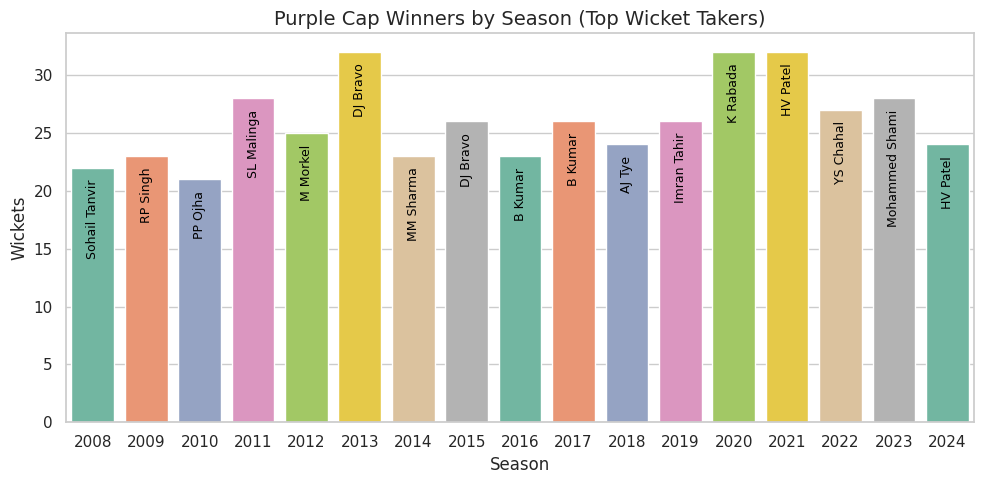

In [112]:
plt.figure(figsize=(10,5))
sns.set(style="whitegrid")

ax = sns.barplot(data=purple_cap, x='Season', y='Wickets', palette='Set2')

purple_cap.index += -1

for i, row in purple_cap.iterrows():
    ax.text(i, row['Wickets'] - 1, row['Purple Cap Winner'], color='black', ha='center', va='top', fontsize=9, rotation=90)

# Title and labels
plt.title('Purple Cap Winners by Season (Top Wicket Takers)', fontsize=14)
plt.xlabel('Season')
plt.ylabel('Wickets')

plt.tight_layout()
plt.show()

**6. Which player has the highest batting average in the IPL?**

In [113]:
# Filter only the rows where a wicket fell
batsman_out_df = dfb[dfb['is_wicket'] == 1]

# Count how many times each batter got out
batsman_out_count = (batsman_out_df['batter'].value_counts().reset_index())
batsman_stats = pd.merge(individual_scores, batsman_out_count, on='batter', how='left')
batsman_stats.columns = ['batter', 'Total_Runs', 'Outs']

# Replace NaN with 0 in the 'Outs' column
batsman_stats['Outs'] = batsman_stats['Outs'].fillna(0)
batsman_stats['Outs'] = batsman_stats['Outs'].astype(int)

# (to avoid division by zero) and who have scored more than 400 runs in total
batsman_stats = batsman_stats[(batsman_stats['Outs']) >0 ]
batsman_stats = batsman_stats[(batsman_stats['Total_Runs']>400)]

# Calculate Batting Average
batsman_stats['Batting_Average'] = (batsman_stats['Total_Runs'] / batsman_stats['Outs']).round(2)

# Sort by batting average
batting_stats_sorted = batsman_stats.sort_values(by='Batting_Average', ascending=False)
batting_stats_sorted.reset_index(drop=True, inplace=True)
batting_stats_sorted.index += 1
batting_stats_sorted.head(10)

,batter,Total_Runs,Outs,Batting_Average
1,B Sai Sudharsan,1034,21,49.24
2,DP Conway,924,20,46.20
3,T Stubbs,405,9,45.00
4,HM Amla,577,13,44.38
5,KL Rahul,4689,106,44.24
6,RD Gaikwad,2380,56,42.50
7,AB de Villiers,5181,125,41.45
8,JP Duminy,2029,49,41.41
9,Tilak Varma,1156,28,41.29
10,DA Warner,6567,164,40.04


<ipython-input-114-642bdd41726a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=batting_stats_sorted.head(10), x='batter', y='Batting_Average', palette='Set2')


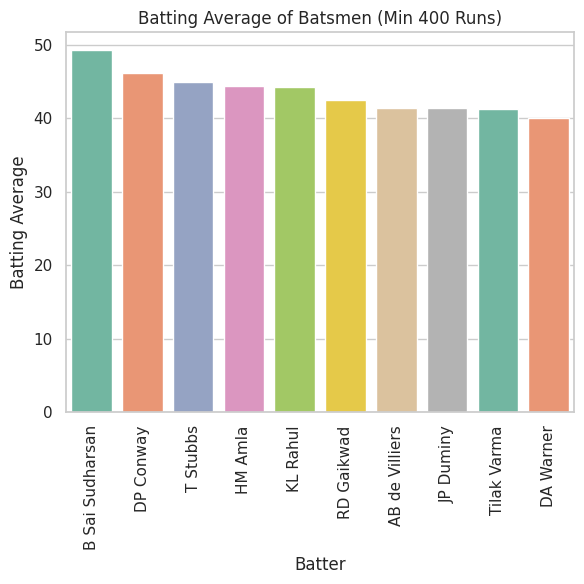

In [114]:
# Plot
plt.figure(figsize=(6, 6))
sns.barplot(data=batting_stats_sorted.head(10), x='batter', y='Batting_Average', palette='Set2')
plt.xticks(rotation=90)
plt.title('Batting Average of Batsmen (Min 400 Runs)')
plt.xlabel('Batter')
plt.ylabel('Batting Average')
plt.tight_layout()
plt.show()

**7. Which player has the lowest bowling average in the IPL?**

In [131]:
# Calculate total runs conceded by each bowler
runs_conceded = dfb.groupby('bowler')['total_runs'].sum().reset_index()
runs_conceded.columns = ['bowler', 'Runs_Conceded']

# Merge the runs conceded data with the wicket data (previously sorted)
bowler_stats = pd.merge(runs_conceded, bowler_wickets_sorted, on='bowler', how='left')
bowler_stats.columns = ['bowler', 'Runs_Conceded', 'Wickets']

bowler_stats['Wickets'] = bowler_stats['Wickets'].fillna(0).astype(int)

# Filter out bowlers who haven't taken any wickets and conceded more than 250 runs
bowler_stats = bowler_stats[(bowler_stats['Wickets'] > 0) & (bowler_stats['Runs_Conceded'] > 250)]

bowler_stats['bowling_average'] = (bowler_stats['Runs_Conceded'] / bowler_stats['Wickets']).round(2)

bowler_stats = bowler_stats.sort_values(by='bowling_average', ascending=True)

bowler_stats.reset_index(drop=True, inplace=True)
bowler_stats.index += 1

bowler_stats.head(10)


,bowler,Runs_Conceded,Wickets,bowling_average
1,Sohail Tanvir,275,22,12.50
2,CRD Fernando,306,17,18.00
3,M Pathirana,617,34,18.15
4,BJ Hodge,310,17,18.24
5,L Ngidi,460,25,18.40
6,DE Bollinger,716,38,18.84
7,AD Mascarenhas,365,19,19.21
8,A Zampa,562,29,19.38
9,MF Maharoof,532,27,19.70
10,R Sai Kishore,259,13,19.92


<ipython-input-116-ed97dc348d0d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bowler_stats.head(10), x='bowler', y='bowling_average', palette='Set3')


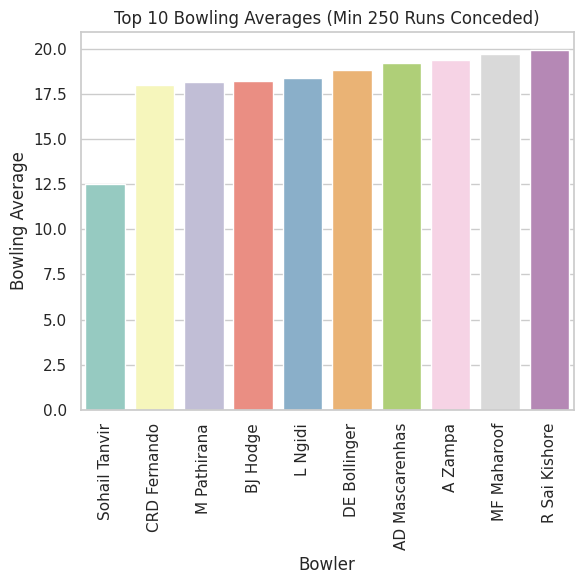

In [116]:
plt.figure(figsize=(6, 6))
sns.barplot(data=bowler_stats.head(10), x='bowler', y='bowling_average', palette='Set3')
plt.xticks(rotation=90)
plt.title('Top 10 Bowling Averages (Min 250 Runs Conceded)')
plt.xlabel('Bowler')
plt.ylabel('Bowling Average')
plt.tight_layout()
plt.show()

**8. Which player has the highest batting strike rate in the IPL?**

In [117]:
# Filter out wide deliveries
legal_deliveries = dfb[dfb['extras_type'] != 'wides']

balls_faced = legal_deliveries['batter'].value_counts().reset_index()
balls_faced.columns = ['batter', 'Balls_Faced']

# Merge the total runs scored with balls faced
balls_faced = pd.merge(individual_scores, balls_faced, on='batter', how='left')
balls_faced.columns = ['Batter', 'Total_Runs', 'Balls_Faced']

# Filter out batters who have faced less than or equal to 100 balls
balls_faced = balls_faced[balls_faced['Balls_Faced'] > 100]

# Calculate Strike Rate
balls_faced['Strike_Rate'] = ((balls_faced['Total_Runs'] / balls_faced['Balls_Faced']) * 100).round(2)
balls_faced = balls_faced.sort_values(by='Strike_Rate', ascending=False)
balls_faced.reset_index(drop=True, inplace=True)
balls_faced.index += 1
balls_faced.head(10)


,Batter,Total_Runs,Balls_Faced,Strike_Rate
1,J Fraser-McGurk,330,141,234.04
2,WG Jacks,230,131,175.57
3,PD Salt,653,372,175.54
4,AD Russell,2488,1423,174.84
5,TM Head,772,444,173.87
6,T Stubbs,405,233,173.82
7,TH David,659,387,170.28
8,BCJ Cutting,238,141,168.79
9,H Klaasen,993,590,168.31
10,Ashutosh Sharma,189,113,167.26


<ipython-input-118-095386927a27>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=balls_faced.head(10), x='Batter', y='Strike_Rate', palette='Set2')


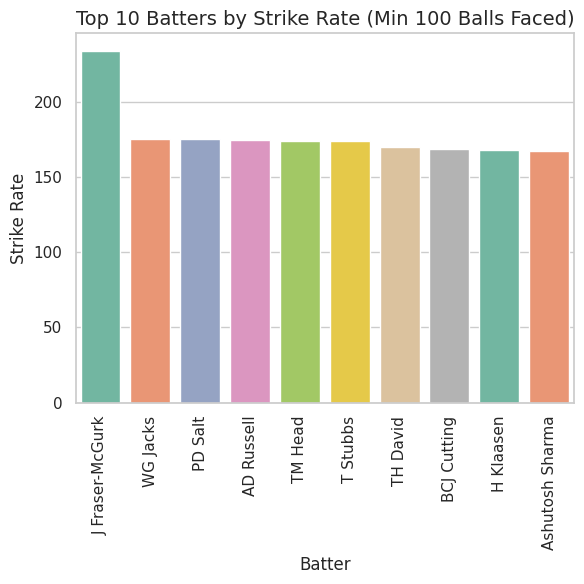

In [118]:
# Set plot style
plt.figure(figsize=(6, 6))
sns.set(style="whitegrid")

# Plot top 10 batters by strike rate
sns.barplot(data=balls_faced.head(10), x='Batter', y='Strike_Rate', palette='Set2')
plt.xticks(rotation=90)

plt.title('Top 10 Batters by Strike Rate (Min 100 Balls Faced)', fontsize=14)
plt.xlabel('Batter')
plt.ylabel('Strike Rate')

plt.tight_layout()
plt.show()

**9. Average Runs Scored by Each Team in the IPL**

In [119]:
# Calculate total runs scored by each team
team_runs = dfb.groupby('batting_team')['total_runs'].sum().reset_index()
team_runs.columns = ['Team', 'Total_Runs']

team_stats = pd.merge(team_runs, matches_played_count, on='Team', how='left')
team_stats.columns = ['Team', 'Total_Runs', 'Matches_Played']

# Calculate average runs per match
team_stats['Average_Runs'] = (team_stats['Total_Runs'] / team_stats['Matches_Played']).round(2)
team_stats = team_stats.sort_values(by='Average_Runs', ascending=False)

team_stats.reset_index(drop=True, inplace=True)
team_stats.index += 1

team_stats


,Team,Total_Runs,Matches_Played,Average_Runs
1,Gujarat Titans,7757,45,172.38
2,Lucknow Super Giants,7510,44,170.68
3,Chennai Super Kings,38629,238,162.31
4,Gujarat Lions,4862,30,162.07
5,Mumbai Indians,42176,261,161.59
6,Punjab Kings,39600,246,160.98
7,Sunrisers Hyderabad,29071,182,159.73
8,Royal Challengers Bengaluru,40622,255,159.30
9,Rajasthan Royals,34747,221,157.23
10,Kolkata Knight Riders,39331,251,156.70


<ipython-input-120-85701060b98e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=team_stats, x='Team', y='Average_Runs', palette='Set2')


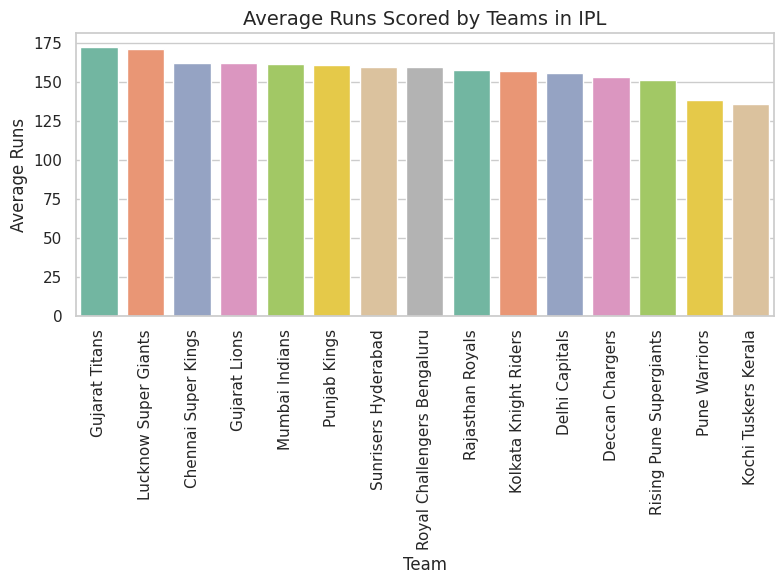

In [120]:
# Plotting average runs scored by teams
plt.figure(figsize=(8, 6))
sns.barplot(data=team_stats, x='Team', y='Average_Runs', palette='Set2')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Add title and labels
plt.title('Average Runs Scored by Teams in IPL', fontsize=14)
plt.xlabel('Team')
plt.ylabel('Average Runs')

# Adjust layout for better fit
plt.tight_layout()
plt.show()


**10. Average wickets taken by Each Team in the IPL**

In [121]:
#  total wickets taken by each team
team_wickets = dfb.groupby('bowling_team')['is_wicket'].sum().reset_index()
team_wickets.columns = ['Team', 'Total_Wickets']

# Merge the wickets data with matches played count
team_wickets = pd.merge(team_wickets, matches_played_count, on='Team', how='left')
team_wickets.columns = ['Team', 'Total_Wickets', 'Matches_Played']

# Calculate average number of wickets per match
team_wickets['Average_Wickets'] = (team_wickets['Total_Wickets'] / team_wickets['Matches_Played']).round(2)
team_wickets = team_wickets.sort_values(by='Average_Wickets', ascending=False)
team_wickets.reset_index(drop=True, inplace=True)
team_wickets.index += 1

team_wickets


,Team,Total_Wickets,Matches_Played,Average_Wickets
1,Gujarat Titans,298,45,6.62
2,Rising Pune Supergiants,189,30,6.30
3,Chennai Super Kings,1481,238,6.22
4,Mumbai Indians,1591,261,6.10
5,Lucknow Super Giants,264,44,6.00
6,Deccan Chargers,446,75,5.95
7,Delhi Capitals,1498,252,5.94
8,Sunrisers Hyderabad,1074,182,5.90
9,Royal Challengers Bengaluru,1494,255,5.86
10,Kolkata Knight Riders,1464,251,5.83


<ipython-input-122-0c4590df5cf8>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=team_wickets, x='Team', y='Average_Wickets', palette='Set2')


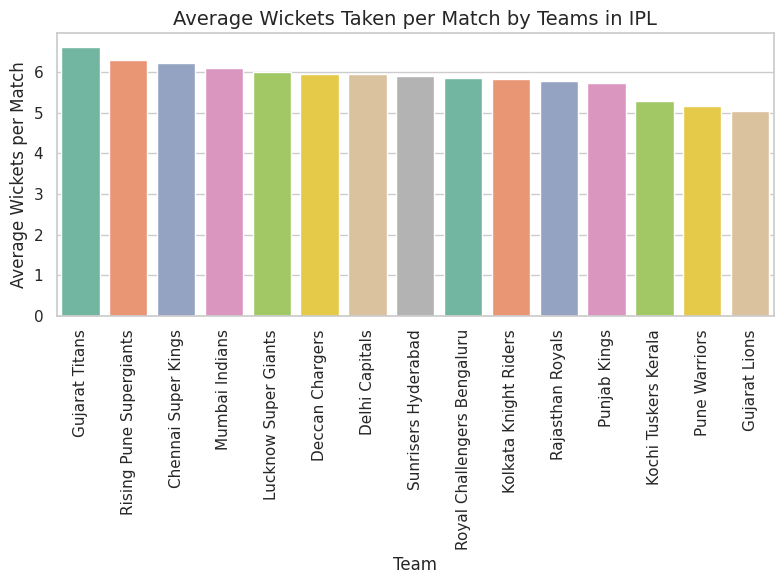

In [122]:
# Plotting average wickets per match by team
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")

# Create the barplot
sns.barplot(data=team_wickets, x='Team', y='Average_Wickets', palette='Set2')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Set title and labels
plt.title('Average Wickets Taken per Match by Teams in IPL', fontsize=14)
plt.xlabel('Team')
plt.ylabel('Average Wickets per Match')

# Display the plot
plt.tight_layout()
plt.show()

**11.How Does the Toss Affect a Game?**

**a. Win Percentage When a Team Loses the Toss**

In [123]:
# Step 1: Filter matches where the team win the toss
dfm['toss_lost'] = dfm.apply(lambda row: row['team2'] if row['toss_winner'] == row['team1'] else row['team1'], axis=1)

toss_lost_count = dfm['toss_lost'].value_counts().reset_index()
toss_lost_count.columns = ['Team', 'Toss_lost_Matches']

toss_lost_wins = dfm[dfm['toss_lost'] == dfm['winner']]
toss_lost_wins_count = toss_lost_wins['toss_lost'].value_counts().reset_index()
toss_lost_wins_count.columns = ['Team', 'Toss_lost_Wins']

toss_lost_stats = pd.merge( toss_lost_wins_count,toss_lost_count, on='Team', how='left')
toss_lost_stats['Win_Percentage'] = ((toss_lost_stats['Toss_lost_Wins'] / toss_lost_stats['Toss_lost_Matches']) * 100).round(2)
toss_lost_stats = toss_lost_stats.sort_values(by='Win_Percentage', ascending=False)
toss_lost_stats.columns = ['Team', 'Toss_lost_wins', 'Toss_lost_Matches', 'Win %']
toss_lost_stats.reset_index(drop=True, inplace=True)
toss_lost_stats.index += 1

toss_lost_stats


,Team,Toss_lost_wins,Toss_lost_Matches,Win %
1,Gujarat Titans,14,23,60.87
2,Lucknow Super Giants,14,25,56.00
3,Mumbai Indians,66,118,55.93
4,Chennai Super Kings,63,116,54.31
5,Sunrisers Hyderabad,50,94,53.19
6,Rajasthan Royals,52,101,51.49
7,Punjab Kings,67,137,48.91
8,Kolkata Knight Riders,63,129,48.84
9,Royal Challengers Bengaluru,62,134,46.27
10,Delhi Capitals,54,122,44.26


<ipython-input-124-bc8cc48291d7>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=toss_lost_stats, x='Team', y='Win %', palette='Set2')


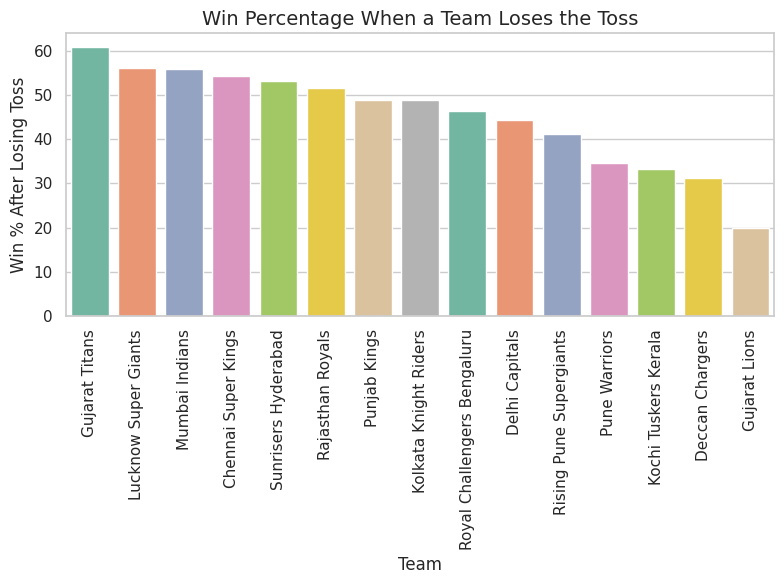

In [124]:
# Set the plot size and style
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")

# Create the bar plot
sns.barplot(data=toss_lost_stats, x='Team', y='Win %', palette='Set2')
plt.xticks(rotation=90)

plt.title('Win Percentage When a Team Loses the Toss', fontsize=14)
plt.xlabel('Team')
plt.ylabel('Win % After Losing Toss')


plt.tight_layout()
plt.show()

**b.Win Percentage When a Team wins the Toss**

In [125]:
# Step 1: Filter matches where the team win the toss
dfm['toss_win'] = dfm.apply(lambda row: row['team1'] if row['toss_winner'] == row['team1'] else row['team2'], axis=1)

toss_win_count = dfm['toss_win'].value_counts().reset_index()
toss_win_count.columns = ['Team', 'Toss_win_Matches']

toss_win_wins = dfm[dfm['toss_win'] == dfm['winner']]
toss_win_wins_count = toss_win_wins['toss_win'].value_counts().reset_index()
toss_win_wins_count.columns = ['Team', 'Toss_win_Wins']

toss_win_stats = pd.merge( toss_win_wins_count,toss_win_count, on='Team', how='left')
toss_win_stats['Win_Percentage'] = ((toss_win_stats['Toss_win_Wins'] / toss_win_stats['Toss_win_Matches']) * 100).round(2)
toss_win_stats = toss_win_stats.sort_values(by='Win_Percentage', ascending=False)
toss_win_stats.columns = ['Team', 'Toss_win_Wins', 'Toss_win_Matches', 'Win %']
toss_win_stats.reset_index(drop=True, inplace=True)
toss_win_stats.index += 1

toss_win_stats


,Team,Toss_win_Wins,Toss_win_Matches,Win %
1,Gujarat Lions,10,15,66.67
2,Gujarat Titans,14,22,63.64
3,Rising Pune Supergiants,8,13,61.54
4,Chennai Super Kings,75,122,61.48
5,Kolkata Knight Riders,68,122,55.74
6,Mumbai Indians,78,143,54.55
7,Lucknow Super Giants,10,19,52.63
8,Royal Challengers Bengaluru,61,121,50.41
9,Kochi Tuskers Kerala,4,8,50.00
10,Rajasthan Royals,60,120,50.00


<ipython-input-126-16af394fd922>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=toss_win_stats, x='Team', y='Win %', palette='Set2')


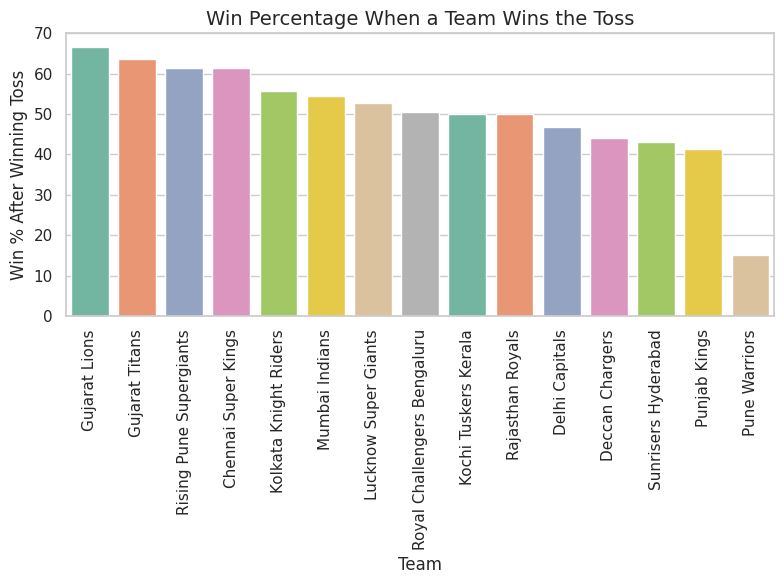

In [126]:
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")

sns.barplot(data=toss_win_stats, x='Team', y='Win %', palette='Set2')
plt.xticks(rotation=90)

plt.title('Win Percentage When a Team Wins the Toss', fontsize=14)
plt.xlabel('Team')
plt.ylabel('Win % After Winning Toss')

plt.tight_layout()
plt.show()

**Complete toss analysis**

In [127]:
toss_stats_combined = pd.merge(
    toss_win_stats[['Team', 'Win %']].rename(columns={'Win %': 'Win % After Winning Toss'}),
    toss_lost_stats[['Team', 'Win %']].rename(columns={'Win %': 'Win % After Losing Toss'}),
    on='Team',
    how='outer'
)

toss_stats_combined.sort_values(by='Win % After Winning Toss', ascending=False, inplace=True)
toss_stats_combined.reset_index(drop=True, inplace=True)
toss_stats_combined.index += 1
toss_stats_combined

,Team,Win % After Winning Toss,Win % After Losing Toss
1,Gujarat Lions,66.67,20.00
2,Gujarat Titans,63.64,60.87
3,Rising Pune Supergiants,61.54,41.18
4,Chennai Super Kings,61.48,54.31
5,Kolkata Knight Riders,55.74,48.84
6,Mumbai Indians,54.55,55.93
7,Lucknow Super Giants,52.63,56.00
8,Royal Challengers Bengaluru,50.41,46.27
9,Rajasthan Royals,50.00,51.49
10,Kochi Tuskers Kerala,50.00,33.33


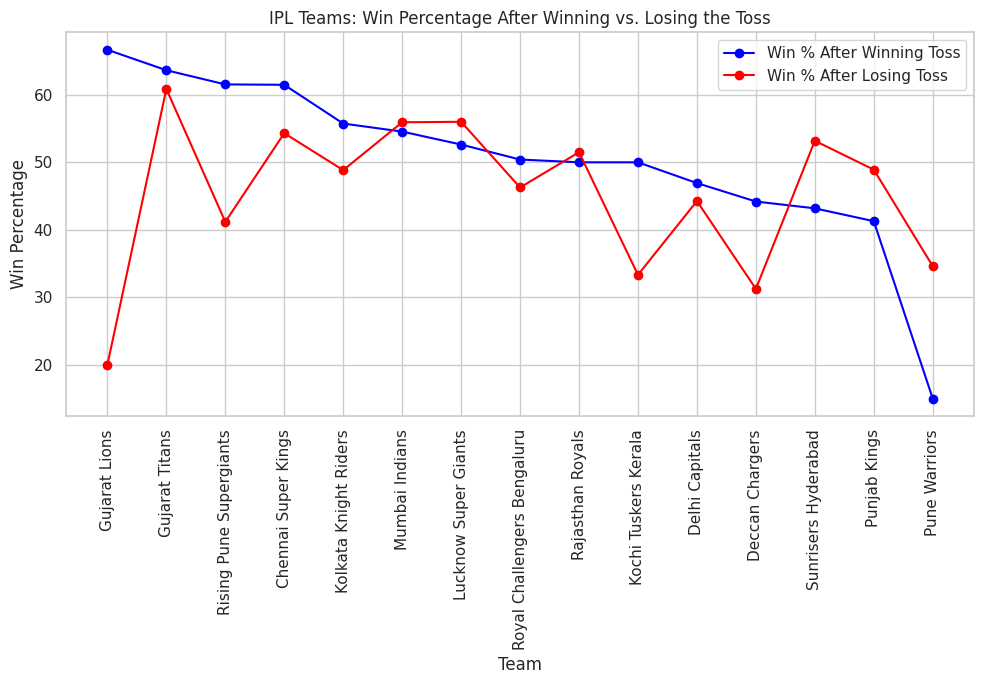

In [128]:
plt.figure(figsize=(10, 7))

plt.plot(toss_stats_combined['Team'], toss_stats_combined['Win % After Winning Toss'], marker='o', label='Win % After Winning Toss', color='blue')
plt.plot(toss_stats_combined['Team'], toss_stats_combined['Win % After Losing Toss'], marker='o', label='Win % After Losing Toss', color='red')

plt.xticks(rotation=90)
plt.title('IPL Teams: Win Percentage After Winning vs. Losing the Toss')
plt.xlabel('Team')
plt.ylabel('Win Percentage')

plt.legend()
plt.tight_layout()
plt.show()

**12.Which venue has hosted the most IPL matches?**

In [129]:
venue_match_counts = dfm['venue'].value_counts().reset_index()
venue_match_counts.columns = ['Venue', 'Matches_Hosted']
venue_match_counts.index += 1
venue_match_counts.head(10)

,Venue,Matches_Hosted
1,"Wankhede Stadium, Mumbai",118
2,"M Chinnaswamy Stadium, Bengaluru",94
3,"Eden Gardens, Kolkata",93
4,"MA Chidambaram Stadium, Chepauk, Chennai",85
5,"Rajiv Gandhi International Stadium, Uppal, Hyd...",77
6,"Punjab Cricket Association Stadium, Mohali",61
7,Feroz Shah Kotla,60
8,"Sawai Mansingh Stadium, Jaipur",57
9,Dubai International Cricket Stadium,46
10,"Dr DY Patil Sports Academy, Mumbai",37


<ipython-input-130-400f9feead70>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


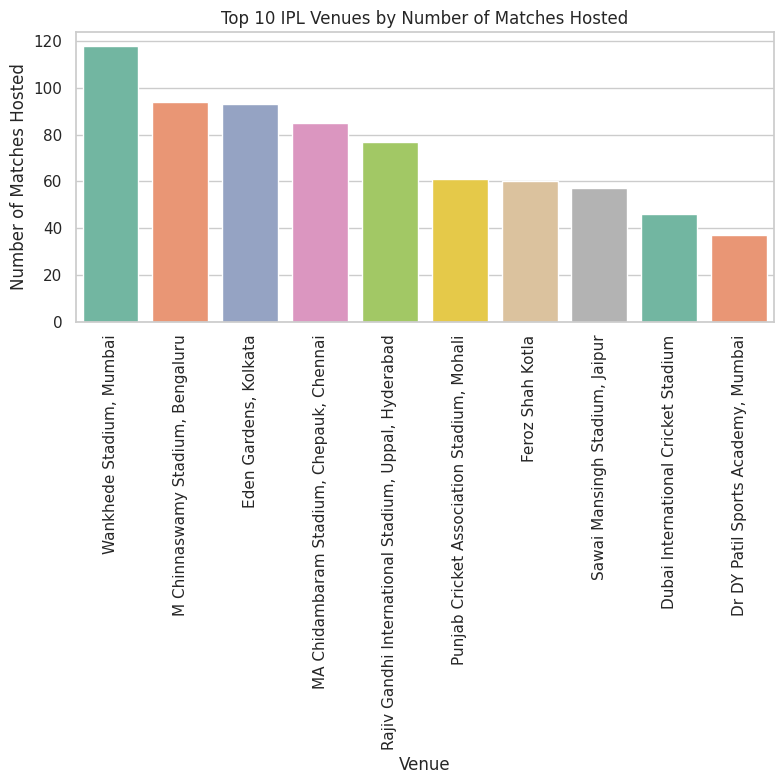

In [130]:
plt.figure(figsize=(8, 8))

sns.barplot(
    data=venue_match_counts.head(10),
    y='Matches_Hosted',
    x='Venue',
    palette='Set2'
)

# Set plot title and axis labels
plt.title('Top 10 IPL Venues by Number of Matches Hosted')
plt.ylabel('Number of Matches Hosted')
plt.xlabel('Venue')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()